# Diabetes model

In [5]:
import logging
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import (
        train_test_split,
        cross_validate,
        cross_val_predict,
        GridSearchCV
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    PowerTransformer,
    LabelEncoder,
    MinMaxScaler
)
from sklearn.tree import (
    DecisionTreeClassifier,
    plot_tree
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import(
    accuracy_score,
    f1_score,
    classification_report,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    DetCurveDisplay
)
logger = logging.getLogger(__name__)
logger.setLevel(logging.ERROR)

### **1. Data loading**
**Objective**: Obtain the data from source and get a first glimpse of their properties and presentation

In [6]:
url = ('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
df_raw = df = pd.read_csv(url, delimiter=',')
df_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df_raw.sample(10, random_state= 2025)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
82,7,83,78,26,71,29.3,0.767,36,0
152,9,156,86,28,155,34.3,1.189,42,1
393,4,116,72,12,87,22.1,0.463,37,0
691,13,158,114,0,0,42.3,0.257,44,1
14,5,166,72,19,175,25.8,0.587,51,1
542,10,90,85,32,0,34.9,0.825,56,1
749,6,162,62,0,0,24.3,0.178,50,1
629,4,94,65,22,0,24.7,0.148,21,0
724,1,111,94,0,0,32.8,0.265,45,0
222,7,119,0,0,0,25.2,0.209,37,0


| Name                               | Description                                                      | Type   | Units               |
|------------------------------------|------------------------------------------------------------------|--------|---------------------|
| Pregnancies                        | Number of times pregnant                                         | Int    | count               |
| Glucose                            | Plasma glucose concentration a 2 hours in an oral glucose test  | Int    | mg/dL               |
| BloodPressure                      | Diastolic blood pressure                                         | Int    | mm Hg               |
| SkinThickness                      | Triceps skin fold thickness                                      | Int    | mm                  |
| Insulin                            | 2-Hour serum insulin                                             | Int    | mu U/ml             |
| BMI                                | Body mass index                                                  | Float  | kg/m²               |
| DiabetesPedigreeFunction           | Diabetes pedigree function                                       | Float  | score               |
| Age                                | Age of the patient                                               | Int    | years               |
| Outcome                            | Class variable (0: no diabetes, 1: diabetes)                     | Int    | binary              |


### **2. Data preprocessing**
**Objectives**: Perform the data cleaning, data transformation and data reduction steps to avoid data mistmatching, noisy data or data not wrangled

In [8]:
df_baking = df_raw.copy()
df_baking.columns = df_baking.columns.str.lower()
df = df_baking.copy()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               768 non-null    int64  
 1   glucose                   768 non-null    int64  
 2   bloodpressure             768 non-null    int64  
 3   skinthickness             768 non-null    int64  
 4   insulin                   768 non-null    int64  
 5   bmi                       768 non-null    float64
 6   diabetespedigreefunction  768 non-null    float64
 7   age                       768 non-null    int64  
 8   outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df.sample(10, random_state=2025)

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
82,7,83,78,26,71,29.3,0.767,36,0
152,9,156,86,28,155,34.3,1.189,42,1
393,4,116,72,12,87,22.1,0.463,37,0
691,13,158,114,0,0,42.3,0.257,44,1
14,5,166,72,19,175,25.8,0.587,51,1
542,10,90,85,32,0,34.9,0.825,56,1
749,6,162,62,0,0,24.3,0.178,50,1
629,4,94,65,22,0,24.7,0.148,21,0
724,1,111,94,0,0,32.8,0.265,45,0
222,7,119,0,0,0,25.2,0.209,37,0


### **3. Exploratory Data Analysis**
**Objective**: Summarize the main characteristics of the dataset using descriptive statistics and data visualization methods

In [11]:
df_train_val, df_test = train_test_split(df, test_size=0.2, random_state=2025)

df_train, df_val = train_test_split(df_train_val, test_size=0.25, random_state=2025)


df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [12]:
display(df_train.describe().T)


,count,mean,std,min,25%,50%,75%,max
pregnancies,460.0,3.747826,3.330308,0.000,1.000,3.000,6.00000,15.000
glucose,460.0,120.982609,30.816622,0.000,99.750,116.500,139.00000,199.000
bloodpressure,460.0,69.426087,17.408740,0.000,62.000,70.000,78.50000,122.000
skinthickness,460.0,21.463043,15.296658,0.000,0.000,24.000,33.00000,60.000
insulin,460.0,88.210870,122.672035,0.000,0.000,52.500,135.00000,846.000
bmi,460.0,31.842391,7.254079,0.000,27.400,32.000,36.40000,52.300
diabetespedigreefunction,460.0,0.481670,0.322130,0.085,0.249,0.399,0.64975,2.329
age,460.0,32.552174,11.362491,21.000,24.000,28.000,40.00000,81.000
outcome,460.0,0.328261,0.470092,0.000,0.000,0.000,1.00000,1.000


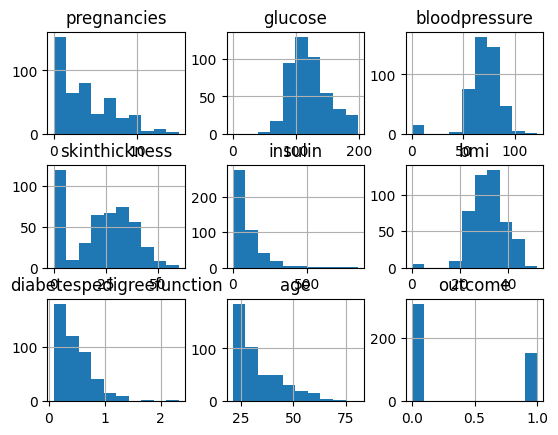

In [13]:
# Analisis univariado
df_train.hist()
plt.show()

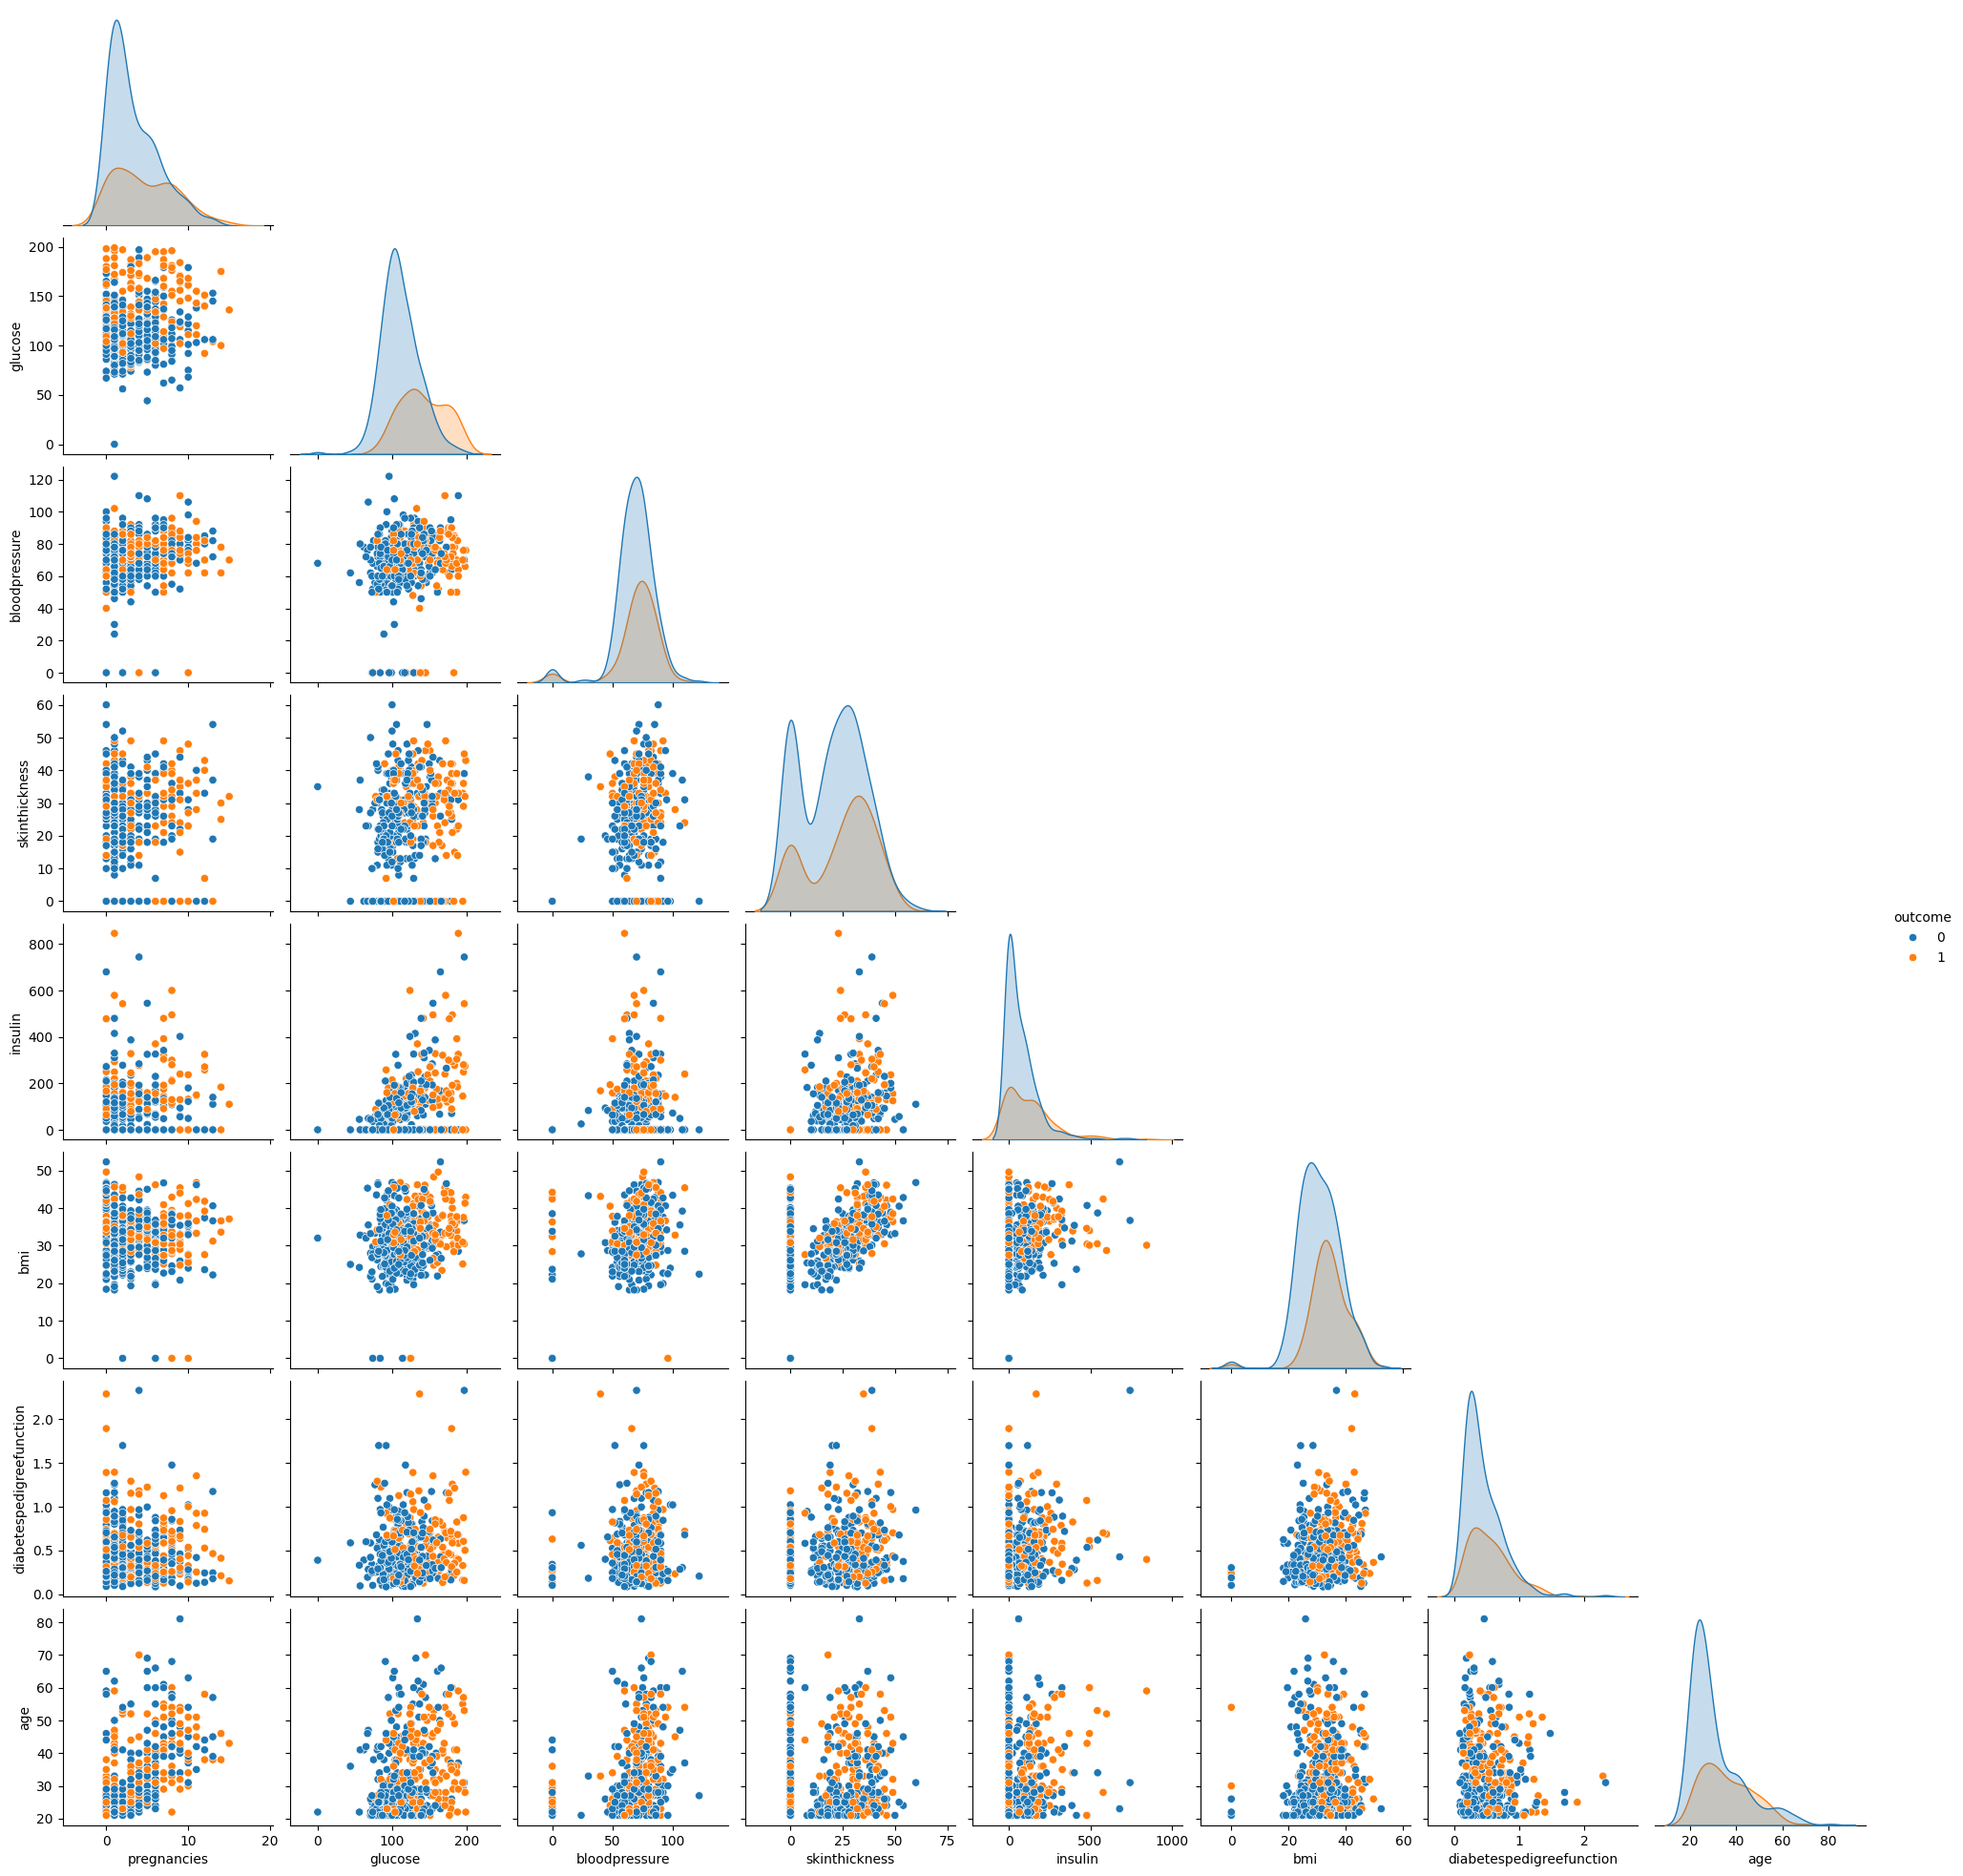

In [14]:
sns.pairplot(data=df_train, hue='outcome', corner=True)
plt.show()

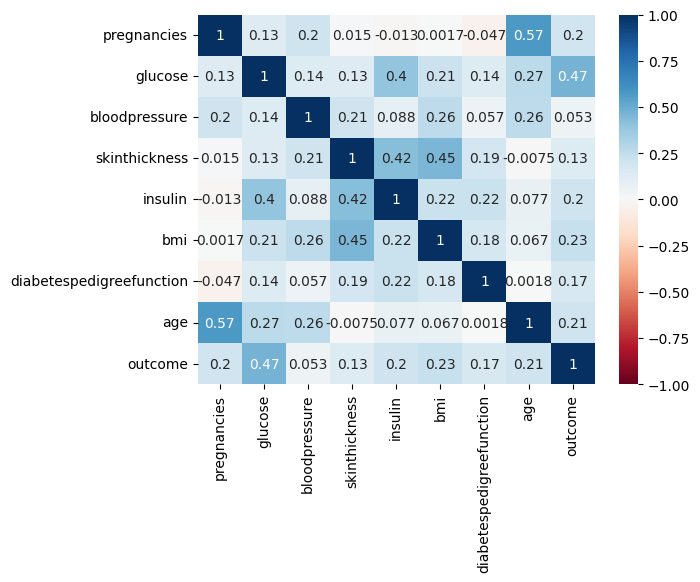

In [15]:
sns.heatmap(data=df_train.select_dtypes('number').corr(), vmin=-1, vmax=1, cmap='RdBu', annot=True)
plt.show()

### 4. Machine learning
**Objective**: Create a model that learns from data to make predictions and generalize to unseen data, and thus perform tasks without explicit instructions

In [16]:
X_train = df_train[['glucose', 'bloodpressure', 'insulin', 'bmi', 'age', 'diabetespedigreefunction']].copy()
y_train = df_train['outcome'].copy()
X_val = df_val[['glucose', 'bloodpressure', 'insulin', 'bmi', 'age', 'diabetespedigreefunction']].copy()
X_test = df_test[['glucose', 'bloodpressure', 'insulin', 'bmi', 'age', 'diabetespedigreefunction']].copy()
y_test = df_test['outcome'].copy()
y_val = df_val['outcome'].copy()

In [17]:
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train) 
y_val_enc = label_encoder.transform(y_val) 
y_test_enc = label_encoder.transform(y_test)

In [18]:
clf_rforest_p = Pipeline([
    ("powertransform", PowerTransformer()),
    ("rforest",RandomForestClassifier(random_state=2025,class_weight="balanced"))
])
clf_rforest_cv = GridSearchCV(
    clf_rforest_p,
    param_grid={
        "rforest__max_depth":[3,5,7,9],
        "rforest__n_estimators":[20,30,50,100]
    },
    cv=5,
    scoring="f1",
    n_jobs=-1
)


In [ ]:
clf_rforest_cv.fit(X_train, y_train_enc)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('powertransform', PowerTransformer()),
                                       ('rforest',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=2025))]),
             n_jobs=-1,
             param_grid={'rforest__max_depth': [3, 5, 7, 9],
                         'rforest__n_estimators': [20, 30, 50, 100]},
             scoring='f1')

              precision    recall  f1-score   support

           0       0.80      0.81      0.81        91
           1       0.73      0.71      0.72        63

    accuracy                           0.77       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.77      0.77      0.77       154



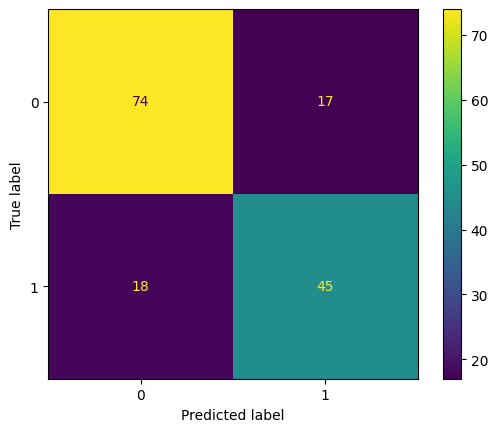

In [23]:
y_hat = clf_rforest_cv.predict(X_test)

# Ensure target_names are passed as an array of class labels (strings)
print(classification_report(y_test_enc, y_hat, target_names=label_encoder.classes_.astype(str)))

# Plot confusion matrix
fig, ax = plt.subplots()  # Create a figure and an axis
ConfusionMatrixDisplay.from_predictions(y_test_enc, y_hat, ax=ax)  # Specify the axis
plt.show()  # Show the plot

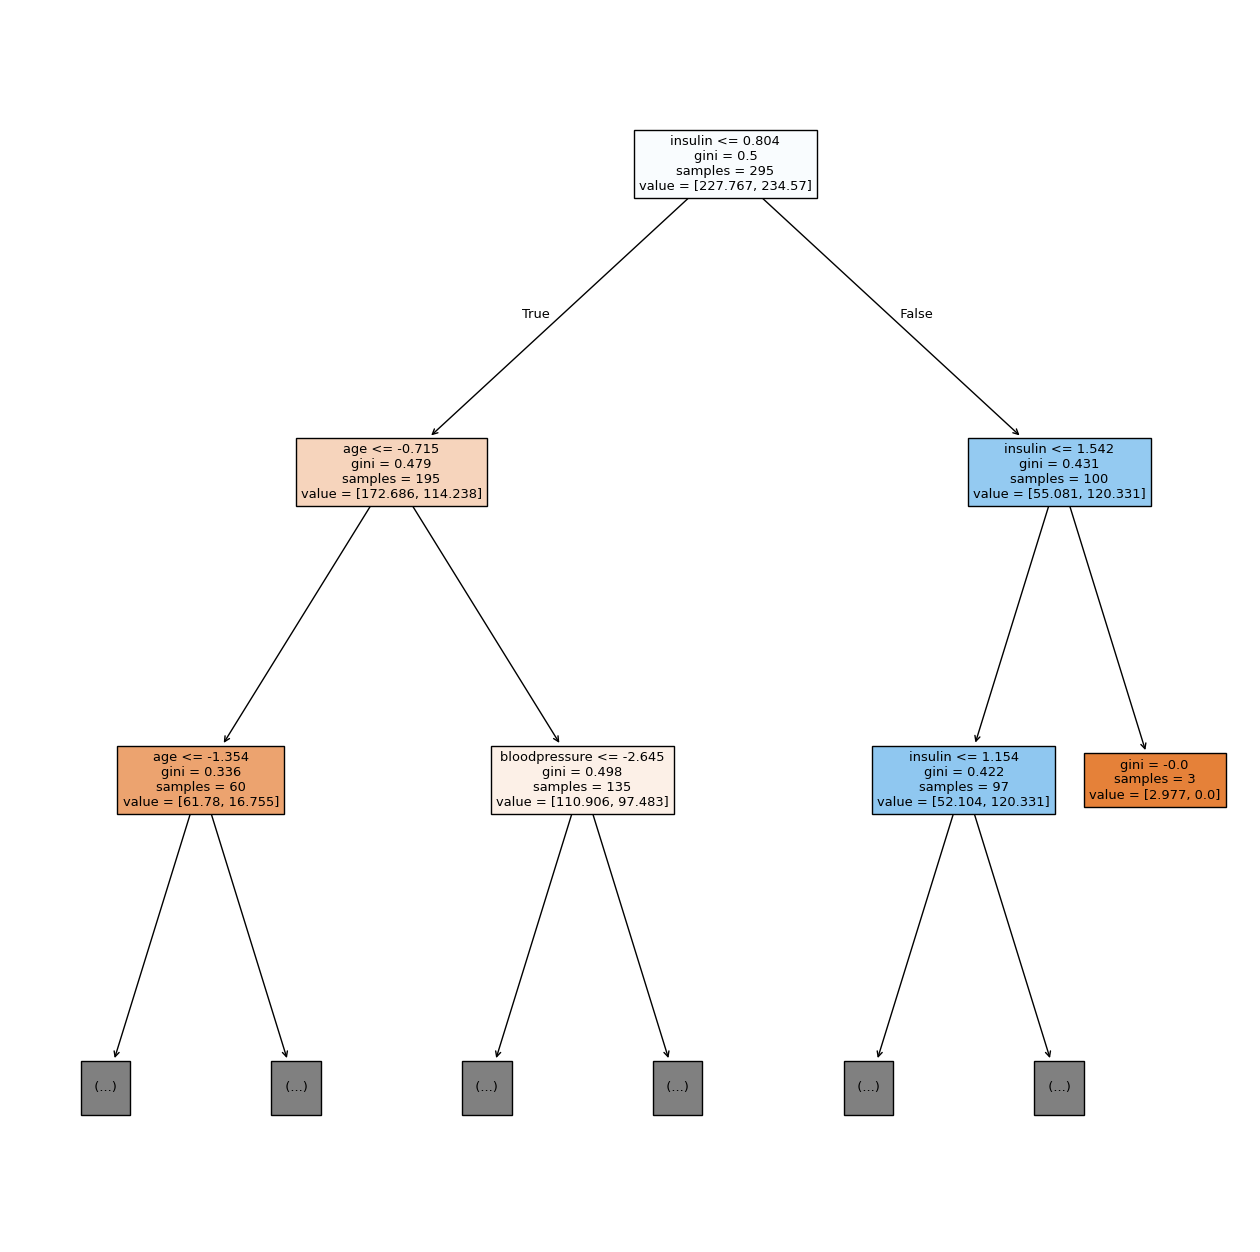

In [27]:
tree_idx = 42  # Any index up to n_estimators-1
plt.figure(figsize=(16, 16))
plot_tree(clf_rforest_cv.best_estimator_.named_steps['rforest'].estimators_[0],
          filled=True,
          feature_names=X_train.columns,
          max_depth=2)  # Shallow depth for clarity
plt.show()

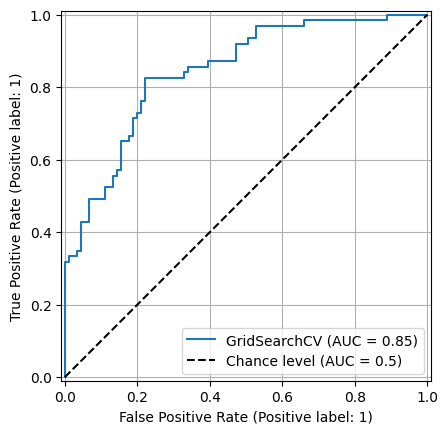

In [28]:
RocCurveDisplay.from_estimator(
    clf_rforest_cv, X_test, y_test_enc, plot_chance_level=True
)
plt.grid(True)
plt.show()

In [29]:
with open('diabetes_rf_model.pkl', 'wb') as f:
    pickle.dump(clf_rforest_cv, f) 
